C:\Users\payge\AppData\Local\Temp\ipykernel_23428\339859148.py:32: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


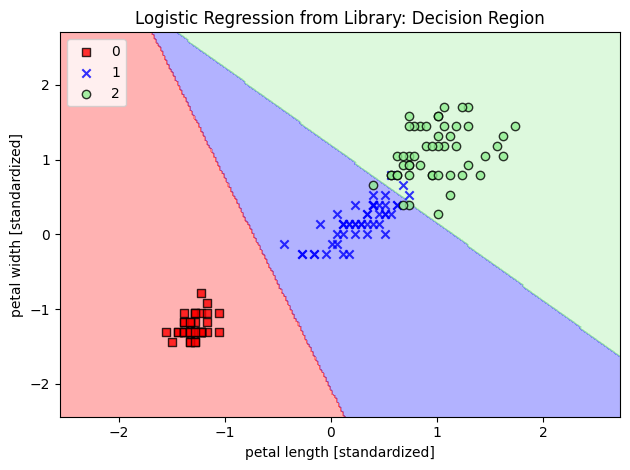

flower 1:
 [3.81527885e-09 1.44792866e-01 8.55207131e-01]
Each column belongs to a class label (see class labels)
Each value in the column predicts the likelihood the flower belongs to that class

flower 2:
 [8.34020679e-01 1.65979321e-01 3.25737138e-13]
Each column belongs to a class label (see class labels)
Each value in the column predicts the likelihood the flower belongs to that class

flower 3:
 [8.48831425e-01 1.51168575e-01 2.62277619e-14]
Each column belongs to a class label (see class labels)
Each value in the column predicts the likelihood the flower belongs to that class

[1. 1. 1.]
Each flowers class based on probability: [2 0 0]
Cleaner version of the above:[2 0 0]


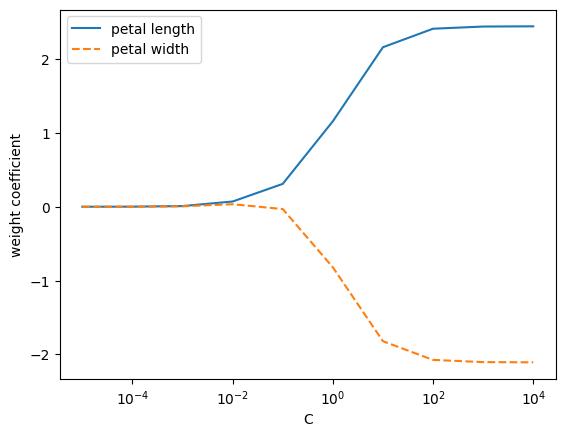

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import OneHotEncoder
import numpy as np


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

def feature_scaling(X_train, X_test):
    #Feature scaling for optimiztion: gradient descent implementation
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    return X_train_std, X_test_std

'''----------------------------------------Perceptron Example----------------------------------'''
def print_classes(y):
    for i in np.unique(y):
        print(class_labels[str(i)])
        


def perceptron_example():
    #load iris data from data set    
    iris = datasets.load_iris()
    #for all rows, pick features 2 and 3
    X = iris.data[:, [2,3]]
    #target values for y (integers)
    y = iris.target

    #Making a class to make it human readable
    class_labels = {
        '0': 'Iris-setosa',
        '1': 'Iris-versicolor',
        '2': 'Iris-virginica'
    }

    #print differnt classes(y)
    print('Class Labels:', np.unique(y))
    
    #create3test and train data for X and y
    #test_size = 30%
    #Stratify: returns random mix and equally proportioned date
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)
    
    X_train_std, X_test_std = feature_scaling(X_train, X_test)
    ppn = Perceptron(eta0=0.1, random_state=1)
    ppn.fit(X_train_std, y_train)

    y_pred = ppn.predict(X_test_std)

    yt = np.bincount(y_test).sum() #total amount of y_test flowers (in this case it returns [15,15,15].sum() which = 45
    print(yt) 
    
    #outputs how many flowers were misclassified
    print('Option 1')
    misclassified_ex = (y_test != y_pred).sum()
    print('Misclassified Examples: %d' % misclassified_ex)
    print(f'Misclassified Error %: {(misclassified_ex/yt)*100}')
    print(f'Accuracy: {(1-(misclassified_ex/yt))*100}')

    #Another option to do this
    print('\nOption 2')
    print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100}')

    #Another option to do this
    print('\nOption 3')
    print(f'Accuracy:{ppn.score(X_test_std, y_test) * 100}')

    plot_decision_regions(X, y, ppn)

    X_combined_std = np.vstack((X_train_std, X_test_std)) 
    y_combined = np.hstack((y_train, y_test))

    #need to fix below
    plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.title('Perceptron')
    plt.tight_layout()
    plt.show()

'''
-----------------------------------------------logistical Regression Example ---------------------------------------------
'''

class LogisticRegressionGD(object):
    """Logistical Regression classifier using gradient descent.
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight initialization.
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Logistical cost function value in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples
            is the number of examples and
            n_features is the number of features.
        y : array-like, shape = [n_examples]
            Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, 
                              size=1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            #cost function
            cost = -y.dot(np.log(output)) - ((1-y).dot(np.log(1-output)))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        # X = [[features], [features]....[features]]
        #self.w[:1] = array of all the weights [[weights],[weights],[weights]]
        #np.dot(x, self.w_[:1]) = sum of (x)(w)...(xn)(wn)
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        """Compute linear activation"""
        #return sigmoid activation
        return 1./(1. + np.exp(-np.clip(z, -250,250)))
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X)>= 0.0, 1, 0)  #if y >= 0, return 1 else return 0
'''------------------------------------End of class--------------------------------------'''
def sigmoid(z):
    '''
    Logistical Sigmoid function
    theta(z) = 1 % (1 + e^-z)
        where z = w(transpose)X
        where e = ....
    '''
    return 1.0/(1.0 + np.exp(-z))

def test_example():
    #Plot the sigmoid function for some values in range of -7 to 7

    z = np.arange(-7, 7, 0.1)
    phi_z = sigmoid(z)

    plt.plot(z, phi_z)
    plt.axvline(0.0, color='k')
    plt.xlabel('z')
    plt.ylabel('$\phi (z)$')
    plt.yticks([0.0, 0.5, 1.0])
    ax = plt.gca()
    ax.yaxis.grid(True)
    plt.tight_layout()
    plt.title('Sigmoid Function Example')
    plt.show()
    
def cost_1(z):
    return -np.log(sigmoid(z))
def cost_0(z):
    return -np.log(1 - sigmoid(z))
    
def theta_example():
    #Example of how the cost of classifying a single training example

    # Return evenly spaced values within a given interval. -10 to 10
    z = np.arange(-10, 10, 0.1)
    phi_z = sigmoid(z)

    c1 = [cost_1(x) for x in z]
    c0 = [cost_0(x) for x in z]
    plt.plot(phi_z, c1, label='J(w) if y=1')
    plt.plot(phi_z, c0, label='J(w) if y=0', linestyle='--')
    plt.ylim(0.0,5.1)
    plt.xlim([0,1])
    plt.xlabel('$\phi$(z)')
    plt.ylabel('J(w)')
    plt.legend(loc='best')
    plt.title('Cost Function')
    plt.tight_layout()
    plt.show()

def logistical_regression():
    #get data
    iris = datasets.load_iris()
    X = iris.data[:, [2,3]]
    y = iris.target
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)

    # Standardizing the features:
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)

    X_train_01_subset = X_train_std[(y_train==0) | (y_train==1)]
    y_train_01_subset = y_train[(y_train==0) | (y_train==1)]

    
    lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
    lrgd.fit(X_train_01_subset,
             y_train_01_subset)
    
    plot_decision_regions(X=X_train_01_subset, 
                          y=y_train_01_subset,
                          classifier=lrgd)

    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.title('Logistic Regression GD Decision Region')
    plt.tight_layout()
    #plt.savefig('images/03_05.png', dpi=300)
    plt.show()
    
#test_example()
#theta_example()
#logistical_regression()
'''------------------------------------Training with Scikit-Learn--------------------------------------'''

def logistical_regression2():
    #Using LogisticRegression from the SciKit-Learn Library
    #get data
    iris = datasets.load_iris()
    X = iris.data[:, [2,3]]
    y = iris.target

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)

    # Standardizing the features:
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    X_combined_std = np.vstack((X_train_std, X_test_std)) 
    y_combined = np.hstack((y_train, y_test))

    #X_train_01_subset = X_train_std[(y_train==0) | (y_train==1)]
    #y_train_01_subset = y_train[(y_train==0) | (y_train==1)]
    #LogisticRegression from the SciKit-Learn Library
    lr = LogisticRegression(
        C=100.0,
        random_state=1,
        solver='lbfgs',
        multi_class='ovr'                 
        )

    lr.fit(X_train_std, y_train)

    plot_decision_regions(X_combined_std, 
                          y_combined,
                          classifier=lr,
                          test_idx=range(105,150)
                         )

    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.title('Logistic Regression from Library: Decision Region')
    plt.tight_layout()
    plt.show()

    class_labels = {
        '0': 'Iris-setosa',
        '1': 'Iris-versicolor',
        '2': 'Iris-virginica'
    }
    
    #Predict the probability of the 1st three flowers with all of their features
    predictions = lr.predict_proba(X_test_std[:3, :])
    for i in range(len(predictions)):
        print(f'flower {i+1}:\n {predictions[i]}')
        print('Each column belongs to a class label (see class labels)')
        print('Each value in the column predicts the likelihood the flower belongs to that class\n')

    #sums up all the columns: They should all equal 1
    print(lr.predict_proba(X_test_std[:3, :]).sum(axis=1))

    #Shows each flowers' largest class probability
    print(f'Each flowers class based on probability: {lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)}')

    #A clearner way of doing the above ^^^
    print(f'Cleaner version of the above:{lr.predict(X_test_std[:3, :])}')
    '''Testing Regularization (C)'''
    weights, params = [], []
    for c in np.arange(-5,5):
        lr=LogisticRegression(
            C = 10.**c,
            random_state = 1,
            solver='lbfgs',
            multi_class='ovr'
        )

        lr.fit(X_train_std, y_train)
        weights.append(lr.coef_[1])
        params.append(10.**c)
    weights =  np.array(weights)
    plt.plot(params, weights[:, 0],
             label='petal length')
    plt.plot(params, weights[:, 1], linestyle='--',
             label='petal width')
    plt.ylabel('weight coefficient')
    plt.xlabel('C')
    plt.legend(loc='upper left')
    plt.xscale('log')
    plt.show()
logistical_regression2()


def OHE_Example():
    Test = 
